- 파일
  - 관련 데이터셋 파일은 dsba_project_data 공유 폴더에 올려놓겠습니다.

# 데이터셋 로드

In [ ]:
#코랩에서 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# scaled_df.to_csv("data_integ.csv", index=True)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#파일 경로 지정(본인 구글 드라이브 폴더명에 따라 수정 바람)
base_path = '/content/drive/MyDrive/digital_smart_busan/DSBA_project_1/dsba_project_data/'

#데이터 불러오기
export_df = pd.read_excel(base_path + 'export_teu.xlsx')  #teu 단위
gdp_df = pd.read_excel(base_path + 'gdp_growth_rate.xlsx')
leading_df = pd.read_excel(base_path + 'oecd_leading.xlsx')
exchange_df = pd.read_excel(base_path + 'won_dollar.xlsx')
gold_df = pd.read_excel(base_path + 'gold_prices.xlsx')
gas_df = pd.read_csv(base_path + 'natural_gas_prices.csv')
brent_df = pd.read_excel(base_path + 'brent_price.xlsx')
trade_df = pd.read_excel(base_path + 'volume_of_trade.xlsx')
news_df = pd.read_csv(base_path + '2010_2025.csv')
#데이터 확인
print("데이터 확인")
print("수출량 :", export_df.shape)
print("GDP성장률 :", gdp_df.shape)
print("경기선행지수 :", leading_df.shape)
print("환율 :", exchange_df.shape)
print("금 :", gold_df.shape)
print("천연가스 :", gas_df.shape)
print("유가 :", brent_df.shape)
print("교역량", trade_df.shape)
print("뉴스", news_df.shape)

데이터 확인
수출량 : (183, 2)
GDP성장률 : (61, 2)
경기선행지수 : (183, 4)
환율 : (183, 2)
금 : (183, 2)
천연가스 : (183, 2)
유가 : (183, 2)
교역량 (183, 2)
뉴스 (183, 4)


In [ ]:
display("수출량 :", export_df.head())
display("GDP성장률 :", gdp_df.head())
display("경기선행지수 :", leading_df.head())
display("환율 :", exchange_df.head())
display("금 :", gold_df.head())
display("천연가스 :", gas_df.head())
display("유가 :", brent_df.head())
display("교역량", trade_df.head())
display("뉴스", news_df.head())

'수출량 :'

,date,수출량(TEU)
0,2025-03-01,1064571
1,2025-02-01,1037534
2,2025-01-01,1022641
3,2024-12-01,1011650
4,2024-11-01,1005161


'GDP성장률 :'

,date,gdp_growth
0,20251/4,1.1
1,20244/4,1.2
2,20243/4,1.5
3,20242/4,2.3
4,20241/4,3.3


'경기선행지수 :'

,date,korea,USA,china
0,2025-03-01 00:00:00,100.9341,100.4902,100.69960
1,2025-02-01 00:00:00,100.8437,100.5202,100.35960
2,2025-01-01 00:00:00,100.7461,100.5018,100.00910
3,2024-12,100.6691,100.4219,99.65845
4,2024-11,100.6294,100.2861,99.31903


'환율 :'

,date,exchange_rate
0,2025/03,1455.500
1,2025/02,1445.575
2,2025/01,1457.915
3,2024/12,1434.420
4,2024/11,1393.380


'금 :'

,date,gold
0,2025-03-01 00:00:00,2987.09
1,2025-02-01 00:00:00,2896.24
2,2025-01-01 00:00:00,2696.59
3,2024-12,2641.22
4,2024-11,2654.24


'천연가스 :'

,date,gas
0,Mar-25,4.119
1,Feb-25,3.834
2,Jan-25,3.044
3,24-Dec,3.633
4,24-Nov,3.363


'유가 :'

,date,brent
0,2025-03-01 00:00:00,72.73
1,2025-02-01 00:00:00,75.44
2,2025-01-01 00:00:00,79.27
3,2024-12,73.86
4,2024-11,74.35


'교역량'

,date,trade_volue
0,2025-03-01 00:00:00,108.379300
1,2025-02-01 00:00:00,108.324921
2,2025-01-01 00:00:00,108.433763
3,2024-12,103.343056
4,2024-11,101.828595


'뉴스'

,Unnamed: 0,positive,neutral,negative
0,Mar-25,41,168,250
1,Feb-25,37,170,212
2,Jan-25,45,183,233
3,Dec-24,52,192,218
4,Nov-24,70,171,200


# 데이터프레임 결합하기

### 형태가 다른 데이터프레임 처리

- problem : 학습에 사용할 데이터 중, gdp 성장률 데이터는 월별 데이터가 아닌 분기별 데이터를 가지고 있다. 즉, 다른 월별 데이터들과 concatenation을 하기 전에 데이터 프레임 형태를 변형시킬 필요가 있다.
- solution : 각 분기를 해당하는 3개월로 복제할 필요가 있다. (1분기 -> 1,2,3월  / 2분기 -> 4,5,6월 / 3분기 -> 7,8,9월 / 4분기 -> 10,11,12월)
  -

- iterrows() : 각 행을 꺼내서 반복
  - idx : 행의 인덱스 번호
  - row : 행의 내용 전체
  - row['date'] -> 20244/4
  - row['gdp_growth'] ->1.2

In [ ]:
import pandas as pd

def expand_quarterly_to_monthly(gdp_df):
    # 월별 날짜 만들기: 2010-01 ~ 2025-03 (183개월)
    monthly_dates = pd.date_range(start='2010-01-01', end='2025-03-01', freq='MS')

    # 각 분기값을 3개월로 확장
    monthly_gdp = []
    for value in gdp_df['gdp_growth']:
        monthly_gdp.extend([value] * 3)

    # 길이 확인 (디버깅용)
    assert len(monthly_gdp) == len(monthly_dates), \
        f"Length mismatch: {len(monthly_gdp)} vs {len(monthly_dates)}"

    # 결과 DataFrame 만들기
    gdp_growth_df = pd.DataFrame({
        'date': monthly_dates,
        'gdp_growth': monthly_gdp
    })

    return gdp_growth_df


In [ ]:
gdp_growth_df = expand_quarterly_to_monthly(gdp_df)
display(gdp_growth_df.head())
print(gdp_growth_df.shape)  # (183, 2)

,date,gdp_growth
0,2010-01-01,1.1
1,2010-02-01,1.1
2,2010-03-01,1.1
3,2010-04-01,1.2
4,2010-05-01,1.2


(183, 2)


In [ ]:
# 필요한 컬럼만 가져와서 Series로 저장
export = export_df['수출량(TEU)'].values
gdp = gdp_growth_df['gdp_growth'].values
exchange = exchange_df['exchange_rate'].values
gold = gold_df['gold'].values
gas = gas_df['gas'].values
korea_leading = leading_df['korea'].values
usa_leading = leading_df['USA'].values
china_leading = leading_df['china'].values
brent = brent_df['brent'].values
trade = trade_df['trade_volue'].values
news_pos = news_df['positive'].values
news_neu = news_df['neutral'].values
news_neg = news_df['negative'].values

# 공통 날짜 인덱스
dates = pd.date_range(start='2010-01-01', end='2025-03-01', freq='MS')[::-1]

# 하나의 데이터프레임으로 만들기
original_df = pd.DataFrame({
    'date': dates,
    'export': export,
    'gdp_growth': gdp,
    'exchange_rate': exchange,
    'gold_price': gold,
    'gas_price': gas,
    'korea_lead': korea_leading,
    'usa_lead' : usa_leading,
    'china_lead' : china_leading,
    'brent_price' : brent,
    'trade' : trade,
    'news_pos' : news_pos,
    'news_neu' : news_neu,
    'news_neg' : news_neg
})

# 날짜를 인덱스로
original_df.set_index('date', inplace=True)
original_df.index = original_df.index.strftime('%Y-%m') #날짜 표시 형식 변경

# 결과 확인
display(original_df.head())

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,news_pos,news_neu,news_neg
date,,,,,,,,,,,,,
2025-03,1064571,1.1,1455.500,2987.09,4.119,100.9341,100.4902,100.69960,72.73,108.379300,41,168,250
2025-02,1037534,1.1,1445.575,2896.24,3.834,100.8437,100.5202,100.35960,75.44,108.324921,37,170,212
2025-01,1022641,1.1,1457.915,2696.59,3.044,100.7461,100.5018,100.00910,79.27,108.433763,45,183,233
2024-12,1011650,1.2,1434.420,2641.22,3.633,100.6691,100.4219,99.65845,73.86,103.343056,52,192,218
2024-11,1005161,1.2,1393.380,2654.24,3.363,100.6294,100.2861,99.31903,74.35,101.828595,70,171,200


In [ ]:
# 첫 번째 비율: 긍정 / (긍정 + 부정)   #pol = 극단값(긍정 / 부정)
original_df['pos_ratio_pol'] = original_df['news_pos'] / (original_df['news_pos'] + original_df['news_neg'])

# 두 번째 비율: 긍정 / (긍정 + 부정 + 중립)
original_df['pos_ratio_total'] = original_df['news_pos'] / (original_df['news_pos'] + original_df['news_neg'] + original_df['news_neu'])

# NaN 방지를 위해 0 나눗셈 처리도 포함할 수 있음
original_df['pos_ratio_pol'] = original_df.apply(lambda row: row['news_pos'] / (row['news_pos'] + row['news_neg']) if (row['news_pos'] + row['news_neg']) > 0 else 0, axis=1)

original_df['pos_ratio_total'] = original_df.apply(lambda row: row['news_pos'] / (row['news_pos'] + row['news_neg'] + row['news_neu']) if (row['news_pos'] + row['news_neg'] + row['news_neu']) > 0 else 0, axis=1)
original_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total
date,,,,,,,,,,,,,,,
2025-03,1064571,1.1,1455.500,2987.09,4.119,100.9341,100.4902,100.69960,72.73,108.379300,41,168,250,0.140893,0.089325
2025-02,1037534,1.1,1445.575,2896.24,3.834,100.8437,100.5202,100.35960,75.44,108.324921,37,170,212,0.148594,0.088305
2025-01,1022641,1.1,1457.915,2696.59,3.044,100.7461,100.5018,100.00910,79.27,108.433763,45,183,233,0.161871,0.097614
2024-12,1011650,1.2,1434.420,2641.22,3.633,100.6691,100.4219,99.65845,73.86,103.343056,52,192,218,0.192593,0.112554
2024-11,1005161,1.2,1393.380,2654.24,3.363,100.6294,100.2861,99.31903,74.35,101.828595,70,171,200,0.259259,0.158730


#데이터 전처리

## 이상치 확인
- 확인 결과, 실제 발생한 사건에 의한 값이라 제거는 하지 않음
- 스케일링 방식을 위해 이상치 분포 확인
  - RobustScaler : 아웃라이어가 많은 경우 아웃라이어의 영향을 효과적으로 최소화해주는 정규화 방법


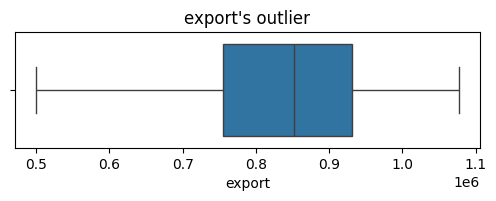

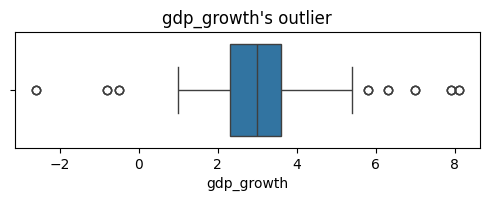

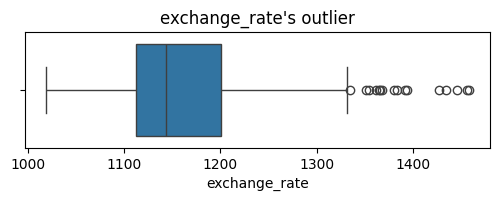

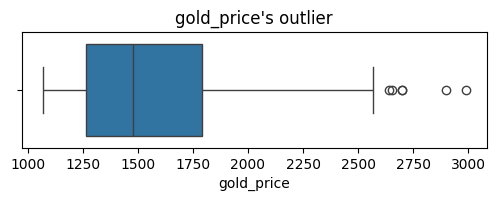

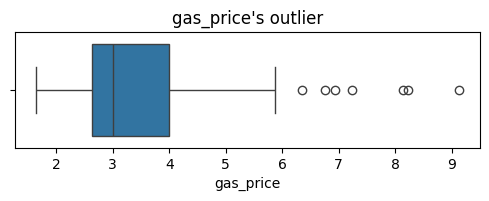

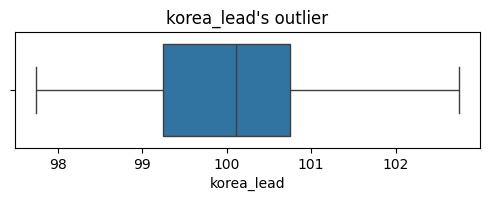

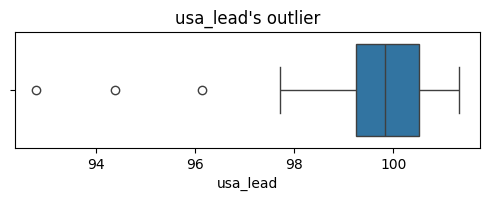

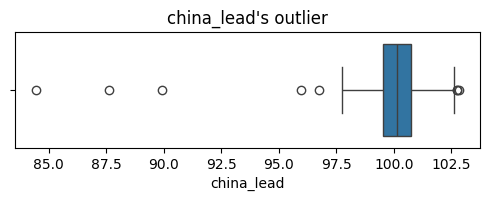

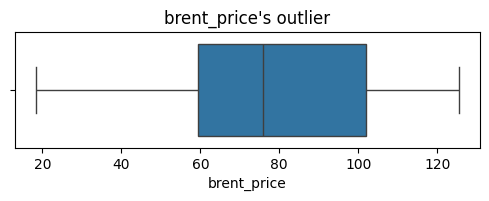

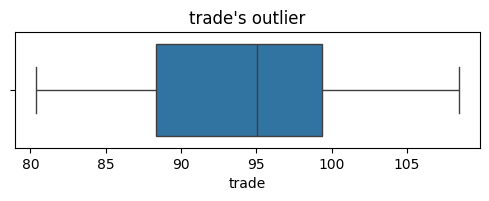

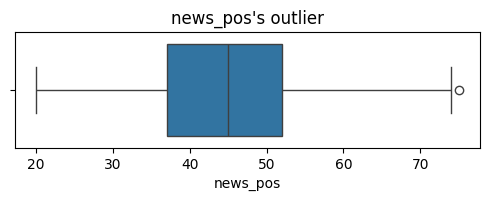

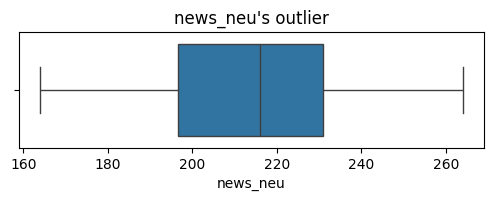

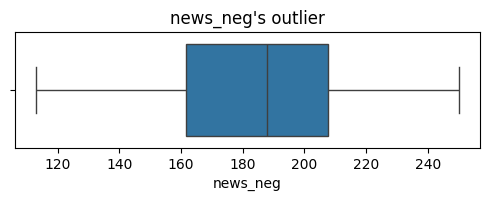

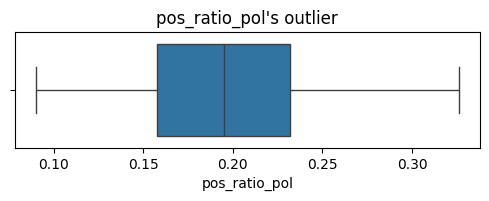

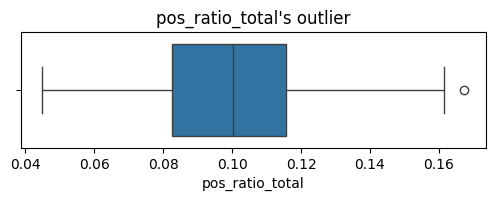

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = original_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=original_df[col])
    plt.title(f'{col}' + "'s outlier")
    plt.show()

## scaling
- StandardScaler: 값들이 정규 분포에 가깝거나 선형 모델을 사용할 때

- MinMaxScaler: 값들을 특정 범위로 맞추고 싶을 때 (특히 신경망)

- RobustScaler: 이상치가 많을 때 사용
  - gas_price , usa , china

- 로그변환
  - export : 극단값 존재함. 큰값을 작게 만들어 정규성 높일 필요 있음

- 스케일링 정리
  - robust scaler : gdp, exchange, gold, gas price , brent (고점 이상치 대응 가능, gdp와 같이 음수 값 허용)
  - standard scaler : korea(정규분포 유사), usa (범위 좁음), china

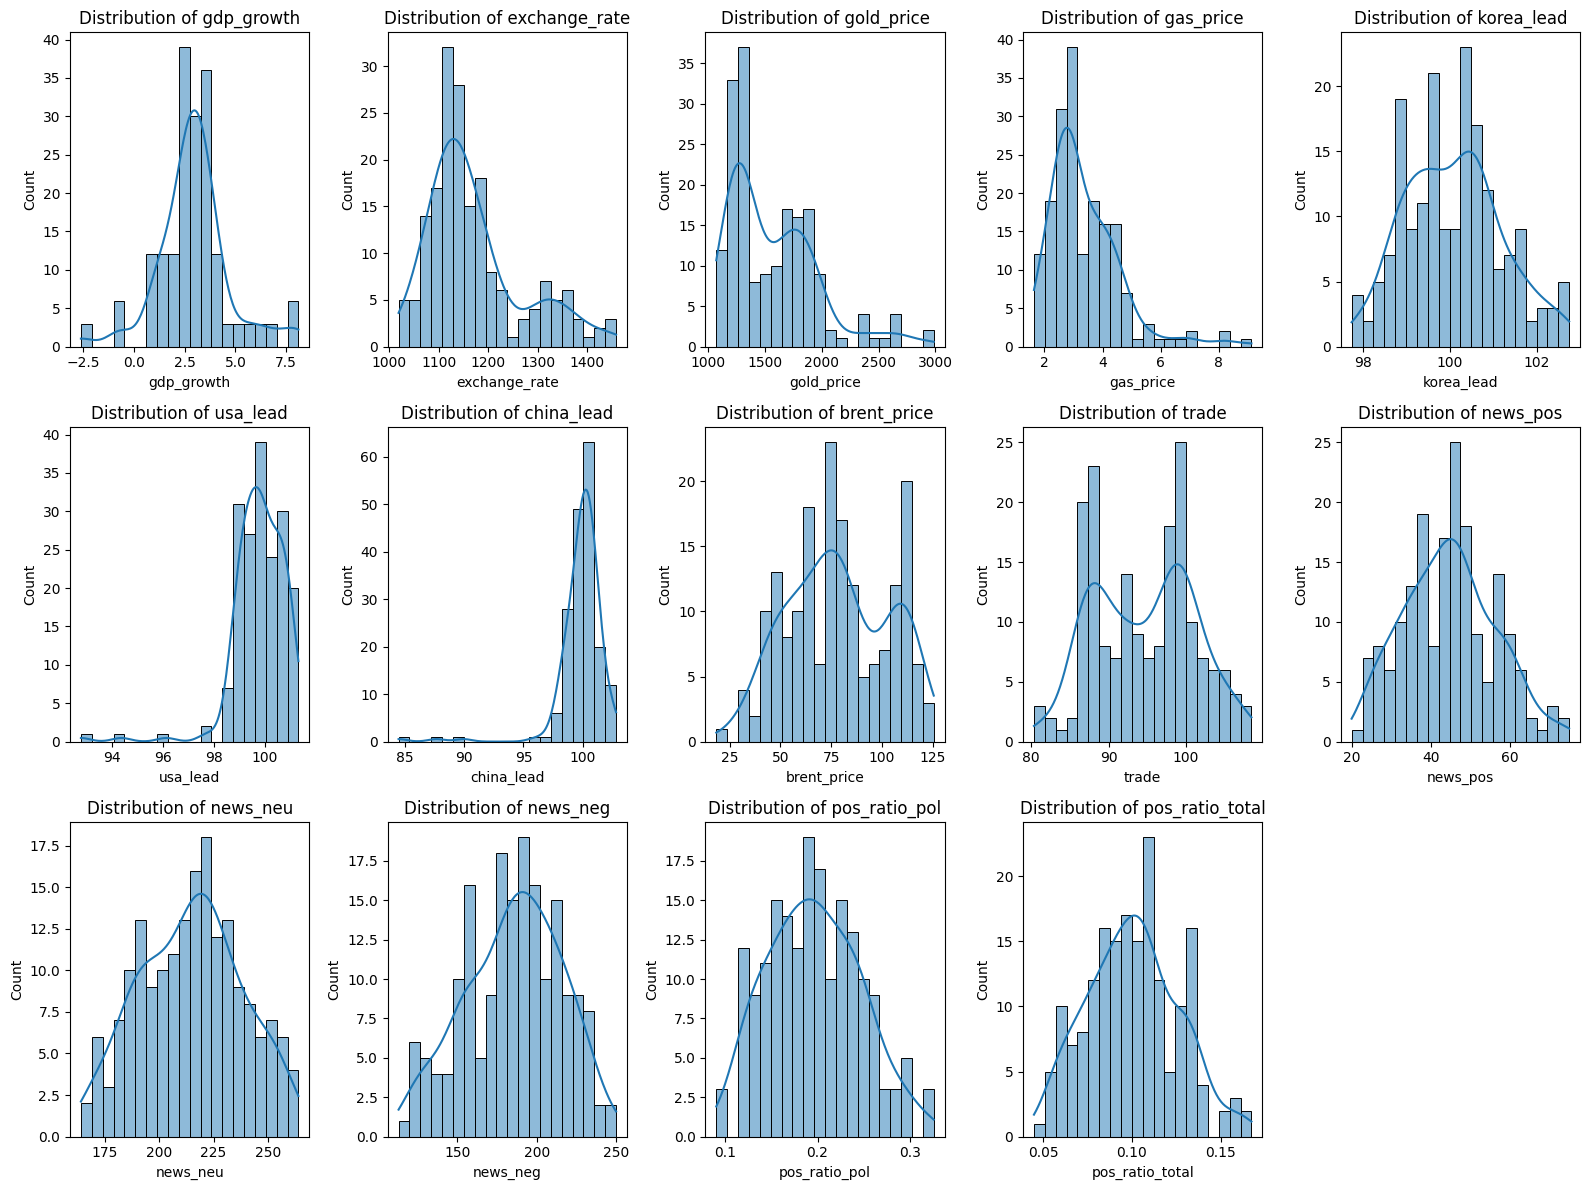

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 리스트
features = ['gdp_growth', 'exchange_rate', 'gold_price', 'gas_price',
            'korea_lead', 'usa_lead', 'china_lead', 'brent_price', 'trade',
            'news_pos','news_neu','news_neg', 'pos_ratio_pol', 'pos_ratio_total']

# 시각화
plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 5, i+1)
    sns.histplot(original_df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

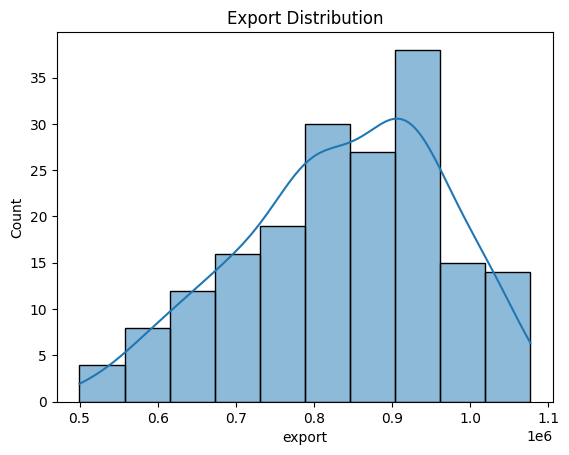

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(original_df['export'], kde=True)
plt.title("Export Distribution")
plt.show()

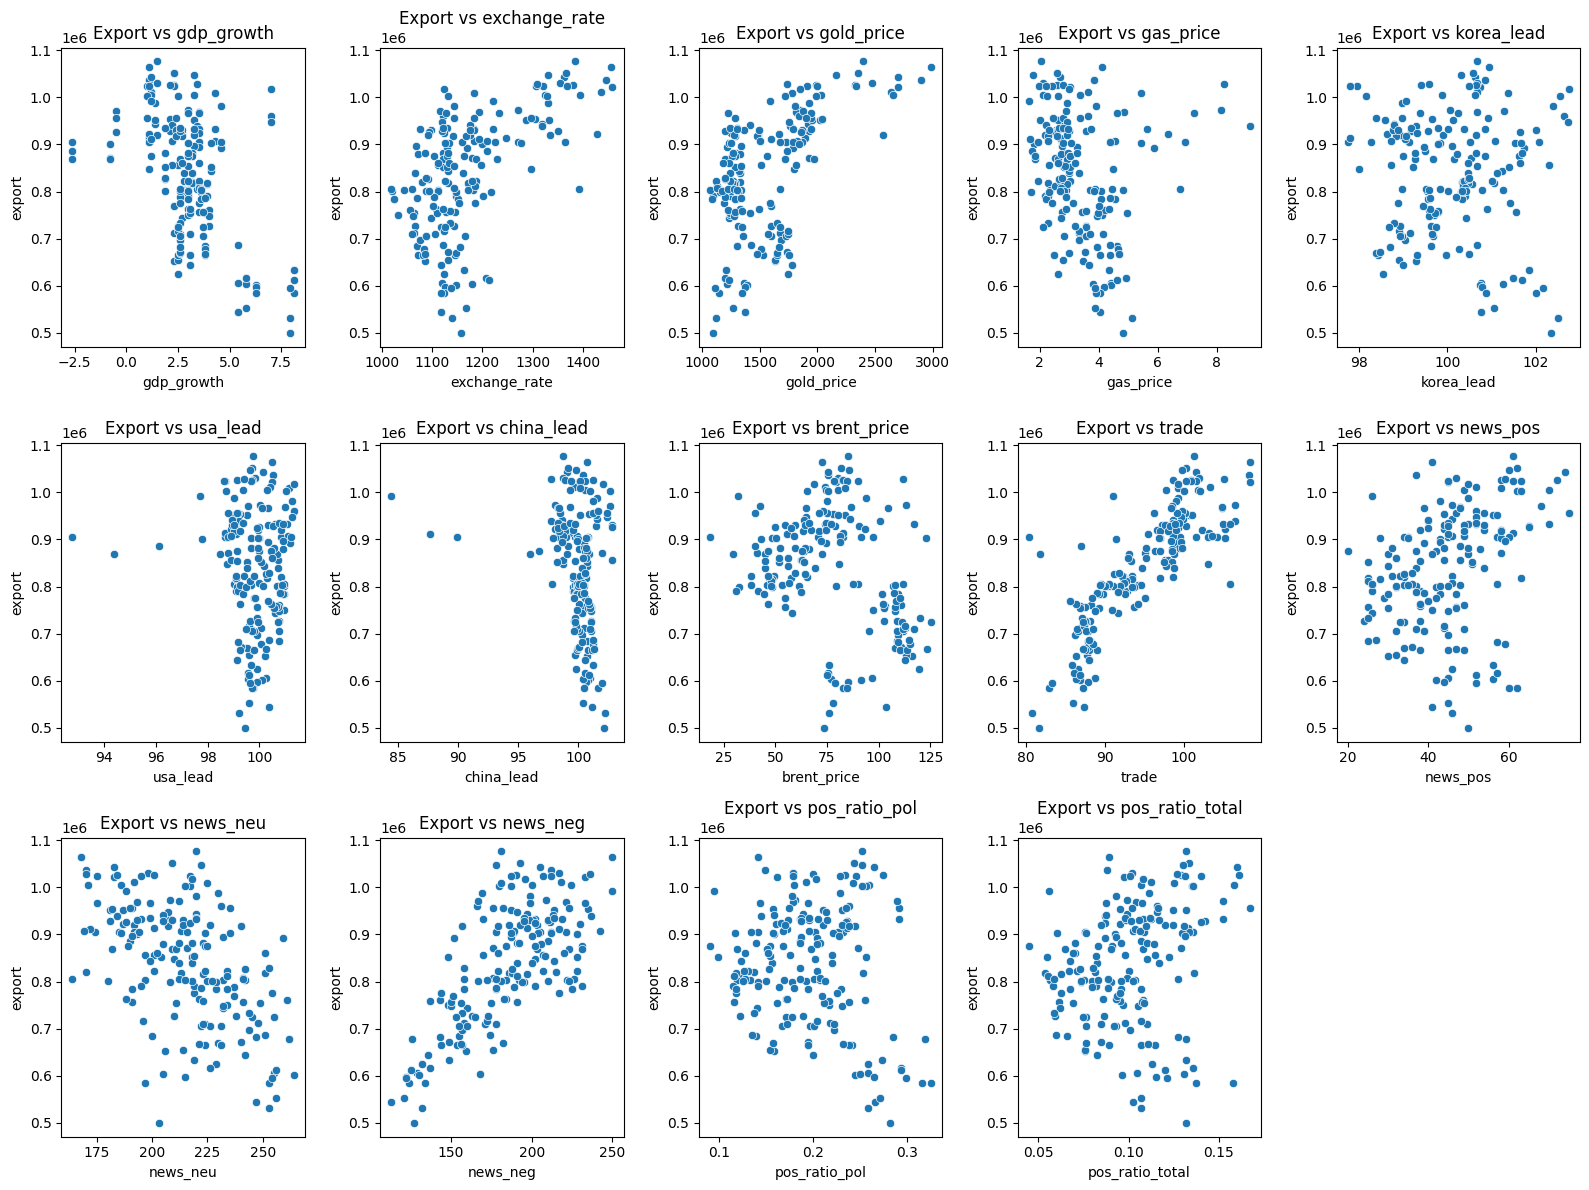

In [ ]:
#scatter로 전체적인 상관관계 확인
import seaborn as sns

features = ['gdp_growth', 'exchange_rate', 'gold_price', 'gas_price',
            'korea_lead', 'usa_lead', 'china_lead', 'brent_price', 'trade',
            'news_pos','news_neu','news_neg', 'pos_ratio_pol', 'pos_ratio_total']

plt.figure(figsize=(16, 12))
for i, col in enumerate(features):
    plt.subplot(3, 5, i+1)
    sns.scatterplot(x = original_df[col], y=original_df['export'])
    plt.title(f'Export vs {col}')
plt.tight_layout()
plt.show()


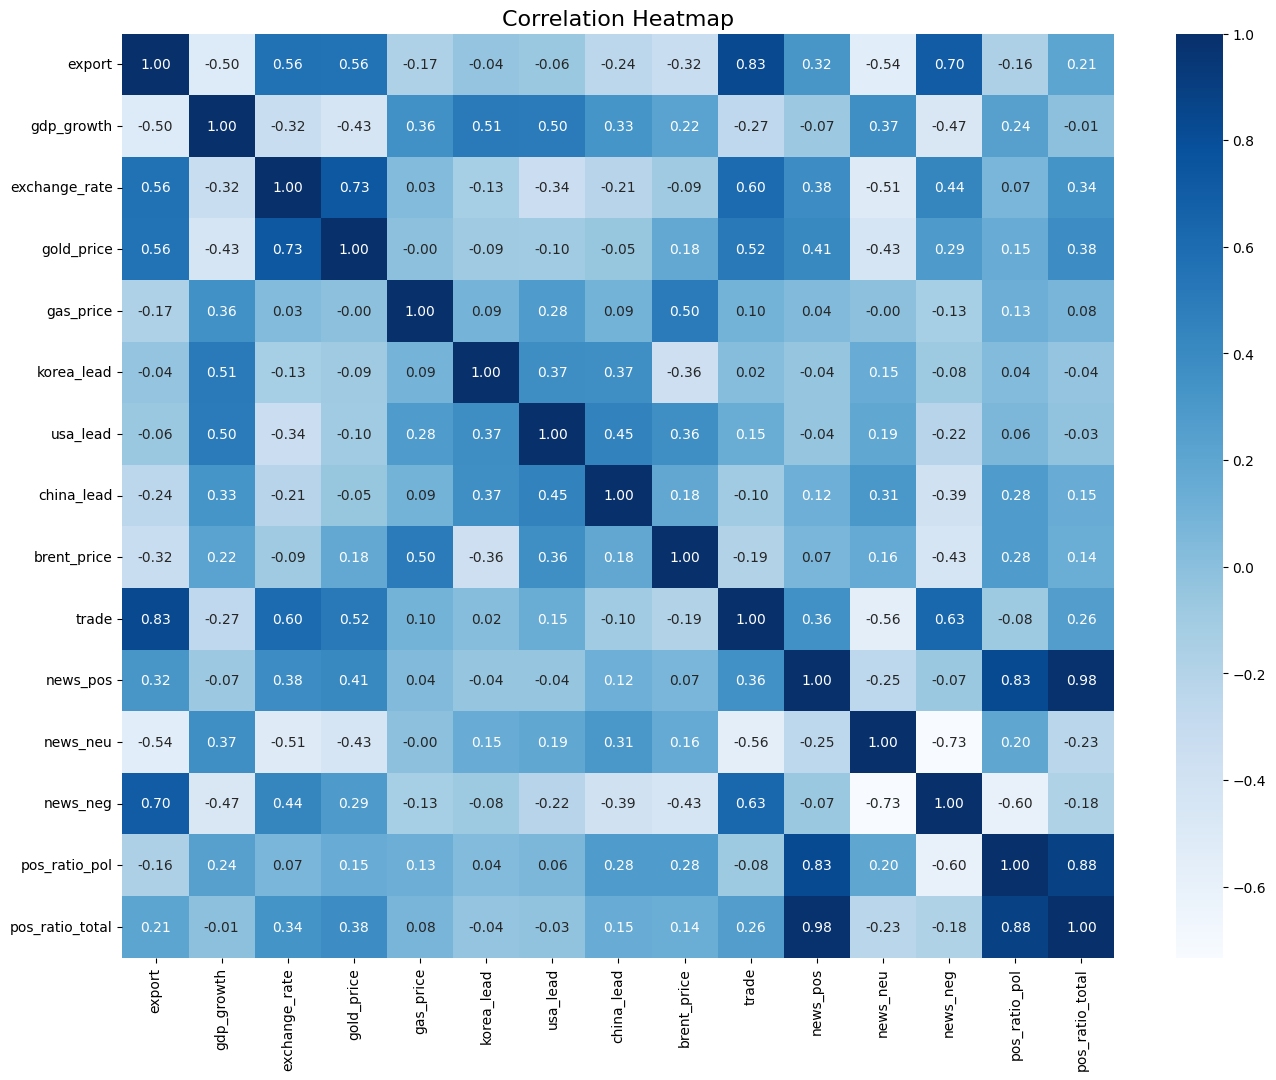

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure 크기 키우기 (예: 16x12)
plt.figure(figsize=(16, 12))

# 상관관계 히트맵 그리기
ax = sns.heatmap(original_df.corr(), cmap='Blues', annot=True, fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16)

plt.show()


### 정규성 검정

In [ ]:
#정규성 검정
#p value가 0.05이하이면 정규성을 따르지 않는다
from scipy.stats import shapiro

for col in features:
    stat, p = shapiro(original_df[col])
    print(f'{col}: p-value = {p:.5f} {"(Not normal)" if p < 0.05 else "(Normal)"}')
# 실제 금융 데이터에서 정규 분포를 따르는것은 흔하지 않은 일이다. (급등락도 많고 꼬리값도 있기 때문)

gdp_growth: p-value = 0.00000 (Not normal)
exchange_rate: p-value = 0.00000 (Not normal)
gold_price: p-value = 0.00000 (Not normal)
gas_price: p-value = 0.00000 (Not normal)
korea_lead: p-value = 0.05169 (Normal)
usa_lead: p-value = 0.00000 (Not normal)
china_lead: p-value = 0.00000 (Not normal)
brent_price: p-value = 0.00034 (Not normal)
trade: p-value = 0.00016 (Not normal)
news_pos: p-value = 0.08501 (Normal)
news_neu: p-value = 0.05923 (Normal)
news_neg: p-value = 0.04452 (Not normal)
pos_ratio_pol: p-value = 0.13011 (Normal)
pos_ratio_total: p-value = 0.11133 (Normal)


### 스케일링

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
import pandas as pd

# 스케일링 대상 변수들
robust_features = ['gdp_growth', 'exchange_rate', 'gold_price', 'gas_price', 'brent_price', 'trade']
standard_features = ['korea_lead', 'usa_lead', 'china_lead']
news_features = ['news_pos', 'news_neu', 'news_neg']

# 복사본 생성
scaled_df = original_df.copy()

# RobustScaler 적용
robust_scaler = RobustScaler()
scaled_df[robust_features] = robust_scaler.fit_transform(original_df[robust_features])

# StandardScaler 적용
standard_scaler = StandardScaler()
scaled_df[standard_features] = standard_scaler.fit_transform(original_df[standard_features])

# 뉴스 관련 피처는 동일한 스케일러로 함께 처리 (비교 일관성 유지)
news_scaler = StandardScaler()
scaled_df[news_features] = news_scaler.fit_transform(original_df[news_features])


In [ ]:
scaled_df.describe()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total
count,1.830000e+02,183.000000,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02,183.000000,183.000000,1.830000e+02,1.830000e+02,1.830000e+02,183.000000,183.000000
mean,8.374356e+05,-0.025221,0.327706,0.166289,0.284085,8.153769e-15,4.717538e-15,9.512731e-16,0.050294,-0.041948,1.941374e-16,2.329648e-16,3.882747e-17,0.196093,0.100446
std,1.275980e+05,1.371288,1.100836,0.732744,0.893813,1.002743e+00,1.002743e+00,1.002743e+00,0.577574,0.584030,1.002743e+00,1.002743e+00,1.002743e+00,0.050254,0.025313
min,4.999050e+05,-4.307692,-1.410694,-0.777177,-0.987250,-2.122113e+00,-6.806481e+00,-7.725548e+00,-1.355705,-1.329863,-2.155781e+00,-2.175177e+00,-2.403152e+00,0.090090,0.044743
25%,7.558180e+05,-0.538462,-0.352389,-0.403879,-0.264845,-7.615732e-01,-5.383989e-01,-1.775923e-01,-0.388202,-0.611856,-6.700401e-01,-7.787105e-01,-7.910913e-01,0.157904,0.082465
50%,8.527220e+05,0.000000,0.000000,0.000000,0.000000,2.530590e-02,1.948593e-02,1.333682e-01,0.000000,0.000000,2.913218e-02,5.916932e-02,8.972543e-02,0.194872,0.100218
75%,9.317075e+05,0.461538,0.647611,0.596121,0.735155,5.986861e-01,6.907315e-01,4.397759e-01,0.611798,0.388144,6.409079e-01,7.036923e-01,7.378736e-01,0.231617,0.115684
max,1.076986e+06,3.923077,3.578555,2.858890,4.467760,2.408098e+00,1.469339e+00,1.469465e+00,1.165666,1.209444,2.651028e+00,2.121643e+00,2.150504e+00,0.326087,0.167411


----

In [ ]:
from sklearn.preprocessing import RobustScaler

# export 원본값 저장
scaled_df['export_restored'] = scaled_df['export']

# RobustScaler 초기화 및 학습
target_scaler = RobustScaler()
scaled_df['export'] = target_scaler.fit_transform(
    scaled_df[['export']]
)
scaled_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total,export_restored
date,,,,,,,,,,,,,,,,
2025-03,1.204444,-1.461538,3.551081,2.858890,0.818944,0.766726,0.660858,0.405080,-0.075827,1.204516,-0.320454,-2.003304,2.150504,0.140893,0.089325,1064571
2025-02,1.050728,-1.461538,3.438168,2.686649,0.611293,0.684879,0.689908,0.234979,-0.012010,1.199597,-0.670040,-1.917368,0.887446,0.148594,0.088305,1037534
2025-01,0.966055,-1.461538,3.578555,2.308137,0.035701,0.596513,0.672091,0.059624,0.078182,1.209444,0.029132,-1.358781,1.585452,0.161871,0.097614,1022641
2024-12,0.903567,-1.384615,3.311263,2.203162,0.464845,0.526799,0.594719,-0.115805,-0.049217,0.748886,0.640908,-0.972067,1.086876,0.192593,0.112554,1011650
2024-11,0.866675,-1.384615,2.844369,2.227847,0.268124,0.490855,0.463216,-0.285617,-0.037678,0.611872,2.214046,-1.874400,0.488586,0.259259,0.158730,1005161


In [ ]:
scaled_df.tail()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total,export_restored
date,,,,,,,,,,,,,,,,
2010-05,-1.250780,3.923077,0.224687,-0.516380,0.980692,1.599408,-0.120287,0.664885,0.000000,-0.839025,0.990494,0.188074,-1.206571,0.273171,0.132075,632723
2010-04,-1.527470,3.923077,-0.298635,-0.630626,0.673953,1.743183,-0.098566,0.856299,0.208878,-1.102936,1.514873,-0.757226,-1.705146,0.316327,0.157761,584056
2010-03,-1.457512,3.769231,-0.065074,-0.691806,0.636794,1.886687,-0.167107,1.019947,0.067821,-1.059457,0.640908,1.691961,-2.104007,0.298851,0.121495,596361
2010-02,-2.005901,3.769231,0.156086,-0.727183,1.324590,2.034808,-0.336104,1.133014,-0.051807,-1.219829,0.466115,-0.499417,-1.937815,0.282486,0.131579,499905
2010-01,-1.822747,3.769231,-0.051650,-0.681625,1.556284,2.183653,-0.589262,1.178041,0.005181,-1.289500,0.116529,1.648993,-1.771623,0.258427,0.106729,532120


In [ ]:
# 인덱스를 datetime으로 변환
scaled_df.index = pd.to_datetime(scaled_df.index)

# 인덱스를 yyyy-mm 문자열로 변환
scaled_df.index = scaled_df.index.to_period('M').astype(str)


In [ ]:
scaled_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total,export_restored
date,,,,,,,,,,,,,,,,
2025-03,1.204444,-1.461538,3.551081,2.858890,0.818944,0.766726,0.660858,0.405080,-0.075827,1.204516,-0.320454,-2.003304,2.150504,0.140893,0.089325,1064571
2025-02,1.050728,-1.461538,3.438168,2.686649,0.611293,0.684879,0.689908,0.234979,-0.012010,1.199597,-0.670040,-1.917368,0.887446,0.148594,0.088305,1037534
2025-01,0.966055,-1.461538,3.578555,2.308137,0.035701,0.596513,0.672091,0.059624,0.078182,1.209444,0.029132,-1.358781,1.585452,0.161871,0.097614,1022641
2024-12,0.903567,-1.384615,3.311263,2.203162,0.464845,0.526799,0.594719,-0.115805,-0.049217,0.748886,0.640908,-0.972067,1.086876,0.192593,0.112554,1011650
2024-11,0.866675,-1.384615,2.844369,2.227847,0.268124,0.490855,0.463216,-0.285617,-0.037678,0.611872,2.214046,-1.874400,0.488586,0.259259,0.158730,1005161


In [ ]:
scaled_df = scaled_df.sort_index()  # 날짜 기준으로 오름차순 정렬

scaled_df.head()

,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total,export_restored
date,,,,,,,,,,,,,,,,
2010-01,-1.822747,3.769231,-0.051650,-0.681625,1.556284,2.183653,-0.589262,1.178041,0.005181,-1.289500,0.116529,1.648993,-1.771623,0.258427,0.106729,532120
2010-02,-2.005901,3.769231,0.156086,-0.727183,1.324590,2.034808,-0.336104,1.133014,-0.051807,-1.219829,0.466115,-0.499417,-1.937815,0.282486,0.131579,499905
2010-03,-1.457512,3.769231,-0.065074,-0.691806,0.636794,1.886687,-0.167107,1.019947,0.067821,-1.059457,0.640908,1.691961,-2.104007,0.298851,0.121495,596361
2010-04,-1.527470,3.923077,-0.298635,-0.630626,0.673953,1.743183,-0.098566,0.856299,0.208878,-1.102936,1.514873,-0.757226,-1.705146,0.316327,0.157761,584056
2010-05,-1.250780,3.923077,0.224687,-0.516380,0.980692,1.599408,-0.120287,0.664885,0.000000,-0.839025,0.990494,0.188074,-1.206571,0.273171,0.132075,632723


In [ ]:
# export 컬럼의 위치 구하기
export_idx = scaled_df.columns.get_loc("export")

# export 왼쪽에 export_restored 삽입
scaled_df.insert(export_idx, "export_restored", scaled_df.pop("export_restored"))
scaled_df.head(3)

,export_restored,export,gdp_growth,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total
date,,,,,,,,,,,,,,,,
2010-01,532120,-1.822747,3.769231,-0.051650,-0.681625,1.556284,2.183653,-0.589262,1.178041,0.005181,-1.289500,0.116529,1.648993,-1.771623,0.258427,0.106729
2010-02,499905,-2.005901,3.769231,0.156086,-0.727183,1.324590,2.034808,-0.336104,1.133014,-0.051807,-1.219829,0.466115,-0.499417,-1.937815,0.282486,0.131579
2010-03,596361,-1.457512,3.769231,-0.065074,-0.691806,0.636794,1.886687,-0.167107,1.019947,0.067821,-1.059457,0.640908,1.691961,-2.104007,0.298851,0.121495


In [ ]:
# scaled_df.to_csv("scaled_df.csv", index=True)

# EDA
- 데이터프레임 설명
  - gdp_growth : gdp 성장률
  - exchange_rage : 원달러 환율
  - korea_lead : oecd 한국 경기선행지수
  - usa_lead : oecd 미국 경기선행지수
  - china_lead : oecd 중국 경기선행지수
  - brent_price : 유가
  - gold_price : 금값
  - gas_price : 천연가스
  - news_pos : 월간 수출량 긍정 뉴스
  - news_neu : 중립 뉴스
  - news_neg : 부정 뉴스
  - pos_ratio_pol : 긍정뉴스 / (긍정+부정)
  - pos_ratio_total : 긍정뉴스 / (긍정+부정+중립)

## 일변량 분석
- 개별 변수들의 특성 확인

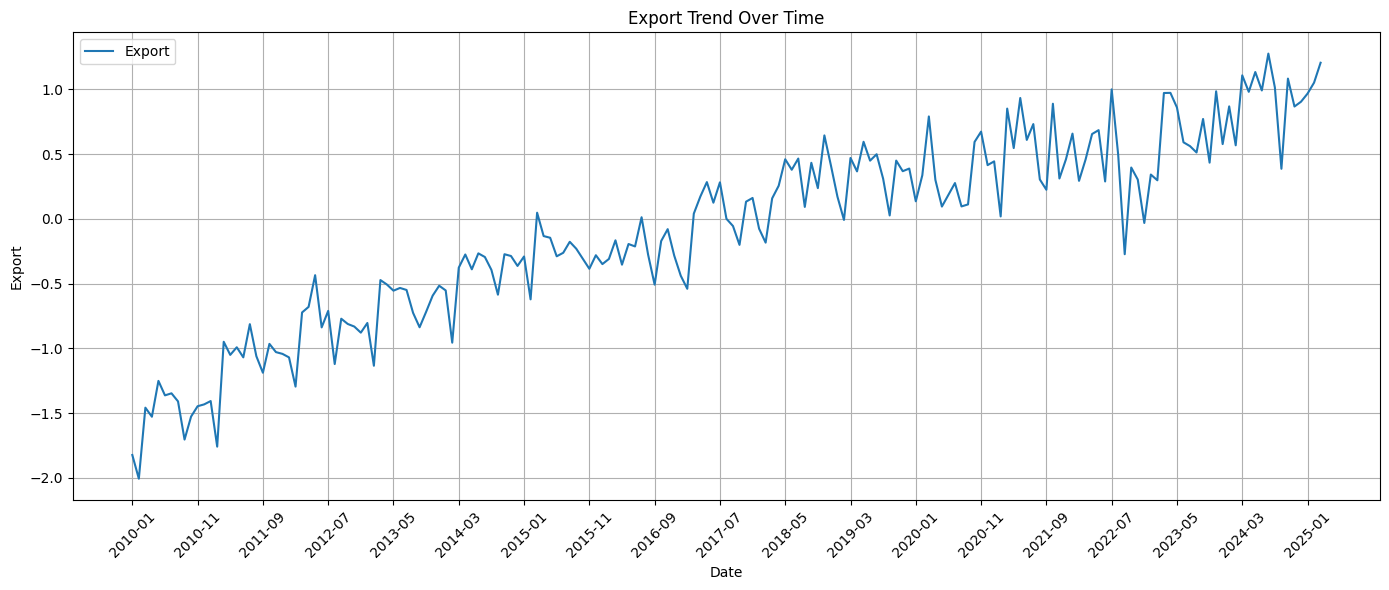

In [ ]:
import matplotlib.pyplot as plt

# 예시 데이터프레임: scaled_df (index가 datetime 또는 str 형식의 월 정보)
plt.figure(figsize=(14, 6))
plt.plot(scaled_df.index, scaled_df['export'], label='Export')

# x축 레이블 10개월마다 표시
plt.xticks(ticks=range(0, len(scaled_df.index), 10), labels=scaled_df.index[::10], rotation=45)

# 보기 좋게 꾸미기
plt.title('Export Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Export')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()



In [ ]:
scaled_df.keys()

Index(['export_restored', 'export', 'gdp_growth', 'exchange_rate',
       'gold_price', 'gas_price', 'korea_lead', 'usa_lead', 'china_lead',
       'brent_price', 'trade', 'news_pos', 'news_neu', 'news_neg',
       'pos_ratio_pol', 'pos_ratio_total'],
      dtype='object')

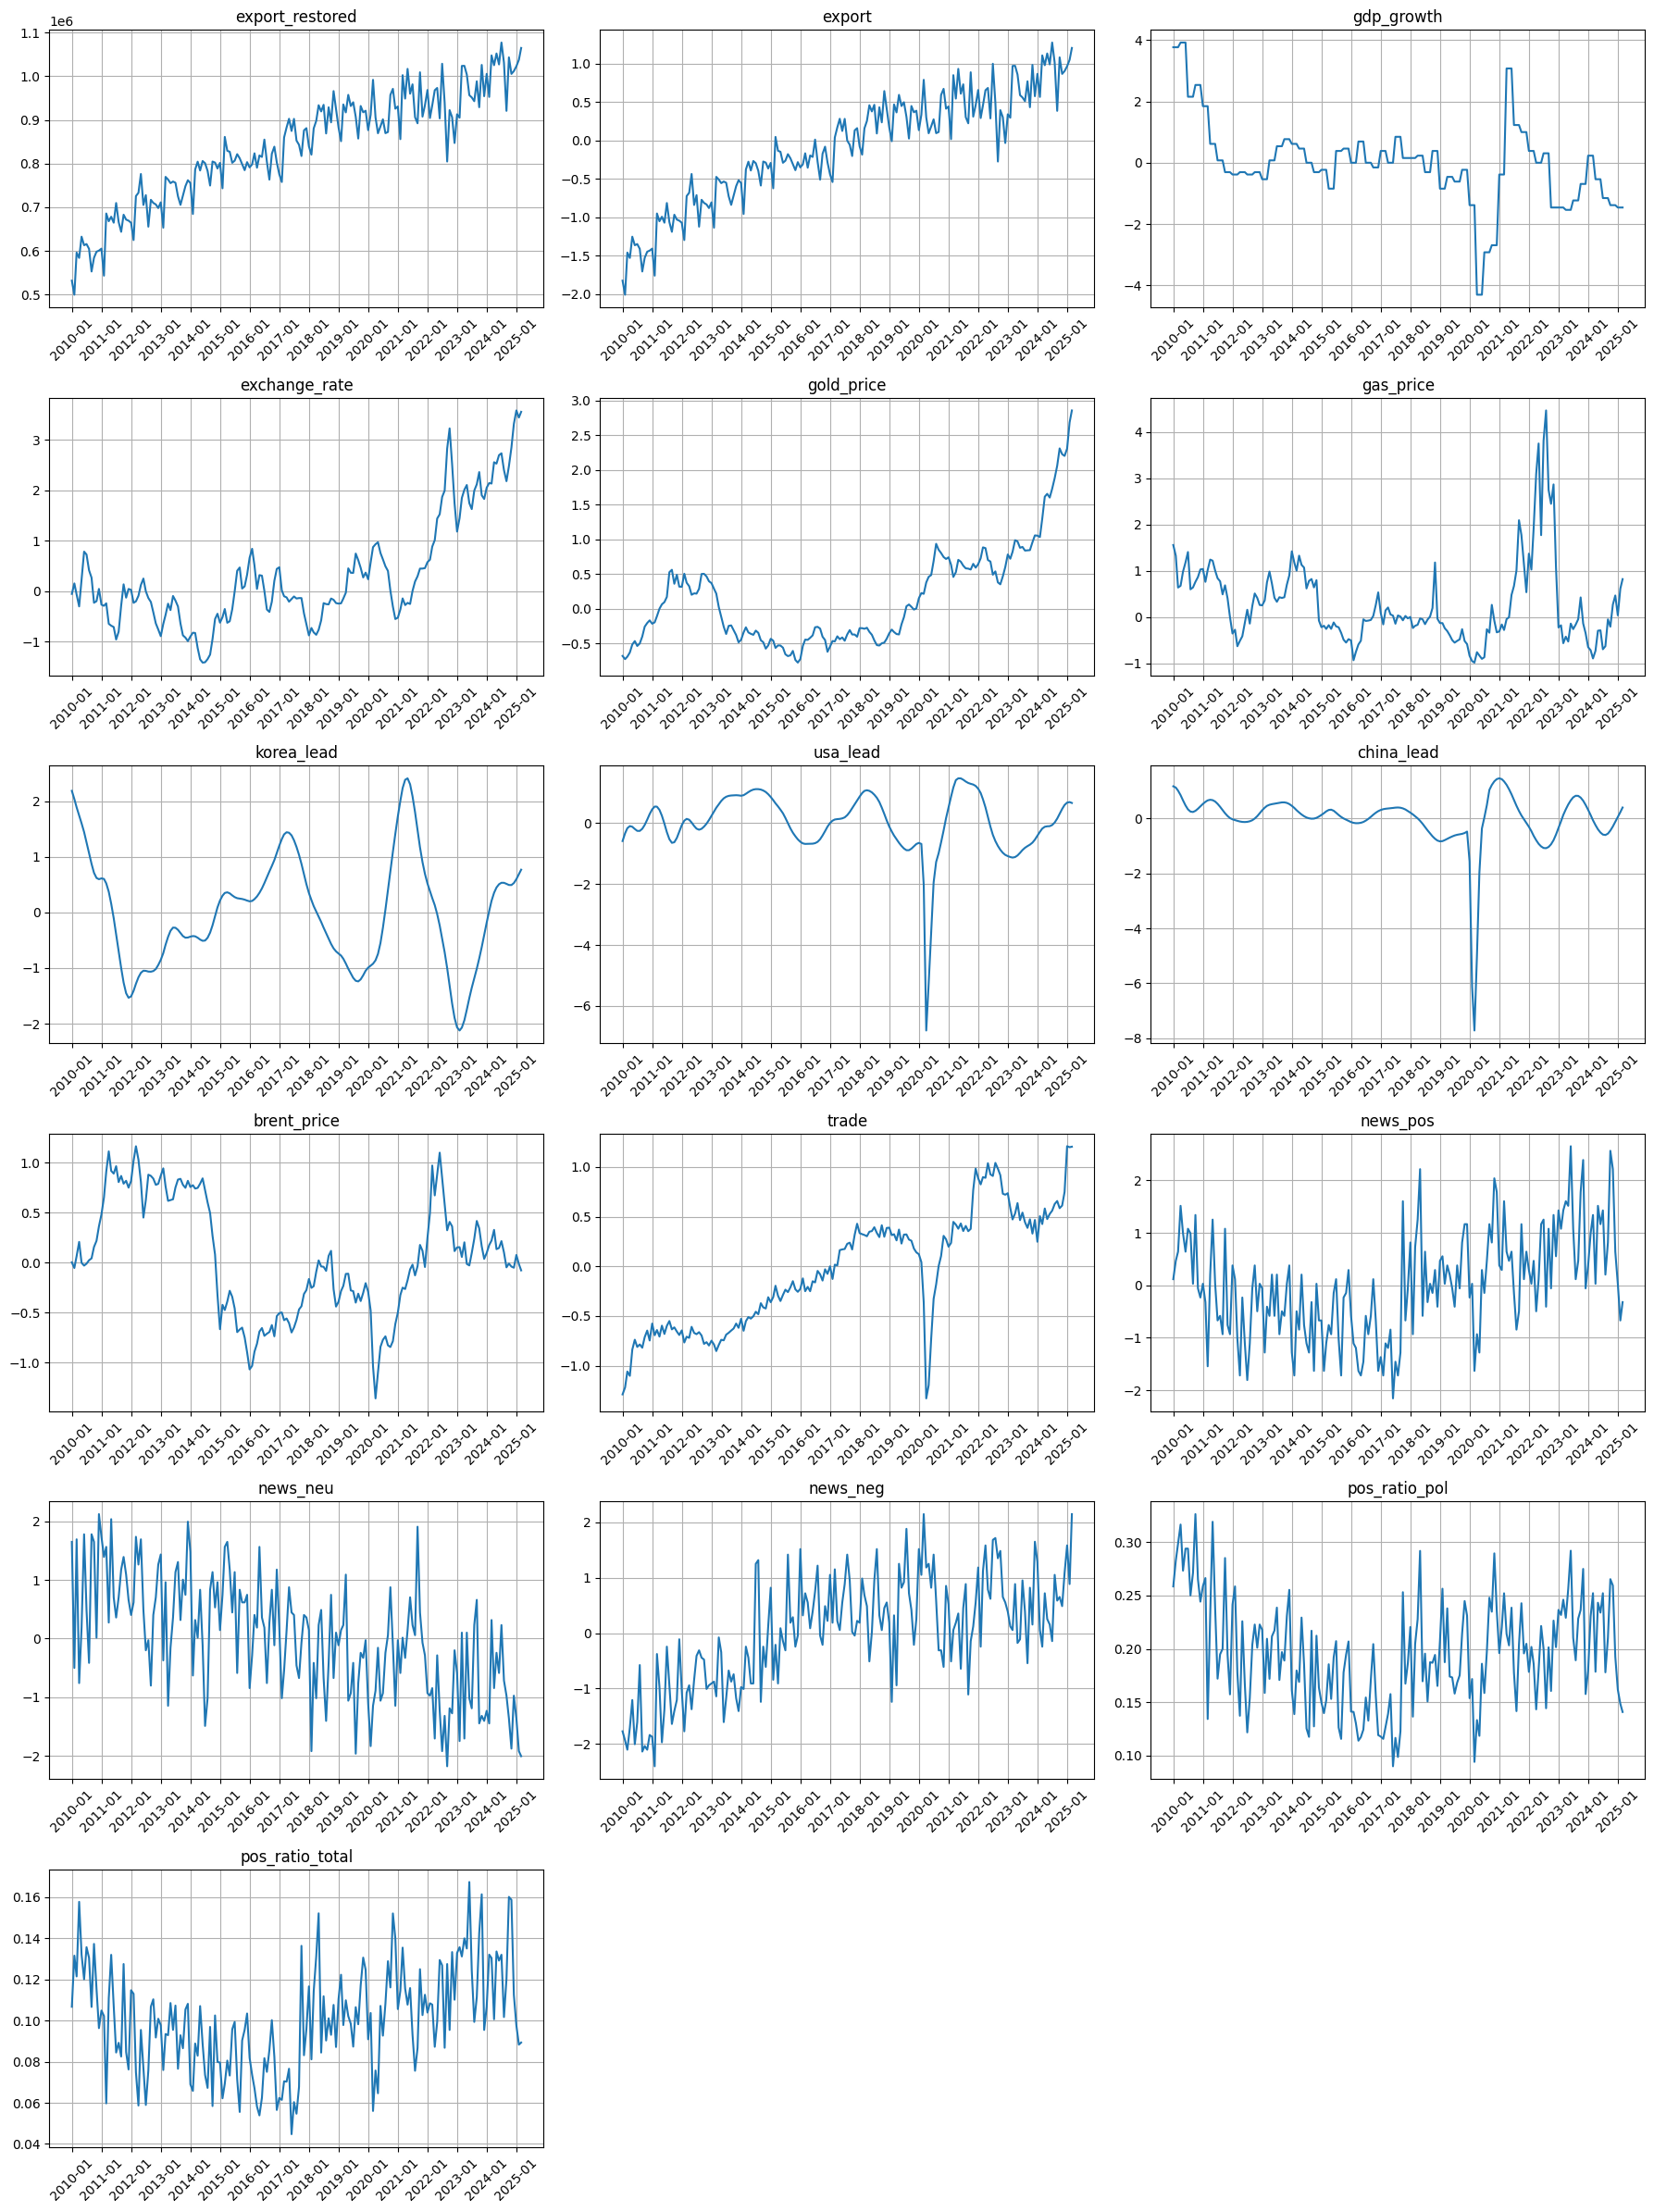

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# datetime 변환 (필요 시)
scaled_df.index = pd.to_datetime(scaled_df.index)

# 그래프에 표시할 컬럼들
columns = ['export_restored', 'export', 'gdp_growth', 'exchange_rate',
       'gold_price', 'gas_price', 'korea_lead', 'usa_lead', 'china_lead',
       'brent_price', 'trade', 'news_pos', 'news_neu', 'news_neg',
       'pos_ratio_pol', 'pos_ratio_total']

# subplot 설정
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
plt.figure(figsize=(18, n_rows * 4))

# 1년마다 1월인 날짜들 추출
tick_locs = [d for d in scaled_df.index if d.month == 1]

# 서브플롯 그리기
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(scaled_df.index, scaled_df[col], label=col)
    plt.title(col, fontsize=12)
    plt.xticks(ticks=tick_locs, labels=[d.strftime('%Y-%m') for d in tick_locs], rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()


##상관관계

### 피처 간 다중공선성 확인(multicollinearity)
- 서로 강하게 상관된 피처가 있으면 영향력을 제대로 분리하기 어려워 예측력이 떨어지거나 해석 어려워지는 경우 있음 -> 하나만 쓰는게 나을 수 있다.
1. 상관관계 분석
2. VIF(Variance inflation fector, 분산확장요인) - 다중공선성 여부 확인  (어떤 변수가 다른 변수들과 얼마나 겹치는가)
  - 설명변수들끼리 겹치느냐를 보는 값.

- 다중공선성 vs 상관관계(correlation)
: 상관성 -> 독립변수와 종속변수를 구분하지 않고 두 변수 간의 상관 정도 계산
: 다중공선성 -> 독립변수들간의 관계(설명변수)를 고려하여 두 개 이상의 독립 변수들 간의 상관 정도 계산

In [ ]:
#다중공선성 여부 확인
#VIF 척도 (분산팽창지수)
#VIF 10 이상이 되면 다중공선성 있다고 판단
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF 계산 함수
def feature_engineering_XbyVIF(scaled_df):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(scaled_df.values, i)
                         for i in range(scaled_df.shape[1])]
    vif['Feature'] = scaled_df.columns
    return vif

# 타겟 변수 'export' 제외한 설명 변수만 사용
X_features = scaled_df.drop(columns=['export'])

# VIF 계산
vif = feature_engineering_XbyVIF(X_features)

# VIF 내림차순 정렬
vif_sorted = vif.sort_values('VIF_Factor', ascending=False).reset_index(drop=True)

# 결과 확인
print(vif_sorted)


     VIF_Factor          Feature
0   2199.302511  pos_ratio_total
1   1511.854103    pos_ratio_pol
2    305.359694  export_restored
3     17.507685         news_pos
4     12.937251         news_neg
5     10.290606         news_neu
6      7.378087      brent_price
7      7.350025            trade
8      6.635656       gold_price
9      5.047162       korea_lead
10     5.015800    exchange_rate
11     4.383556       gdp_growth
12     4.134797         usa_lead
13     2.688547        gas_price
14     1.796396       china_lead


### 피어슨, 스피어맨, 켄달 상관관계 메소드

In [ ]:
# 타겟값 'export'와 수치형 Feature들만 사용
df_corr = scaled_df[['export_restored', 'export', 'gdp_growth', 'exchange_rate',
       'gold_price', 'gas_price', 'korea_lead', 'usa_lead', 'china_lead',
       'brent_price', 'trade', 'news_pos', 'news_neu', 'news_neg',
       'pos_ratio_pol', 'pos_ratio_total']]

# 피어슨
corr_pearson = df_corr.corr(method='pearson')

# 스피어맨
corr_spearman = df_corr.corr(method='spearman')

# 켄달
corr_kendall = df_corr.corr(method='kendall')


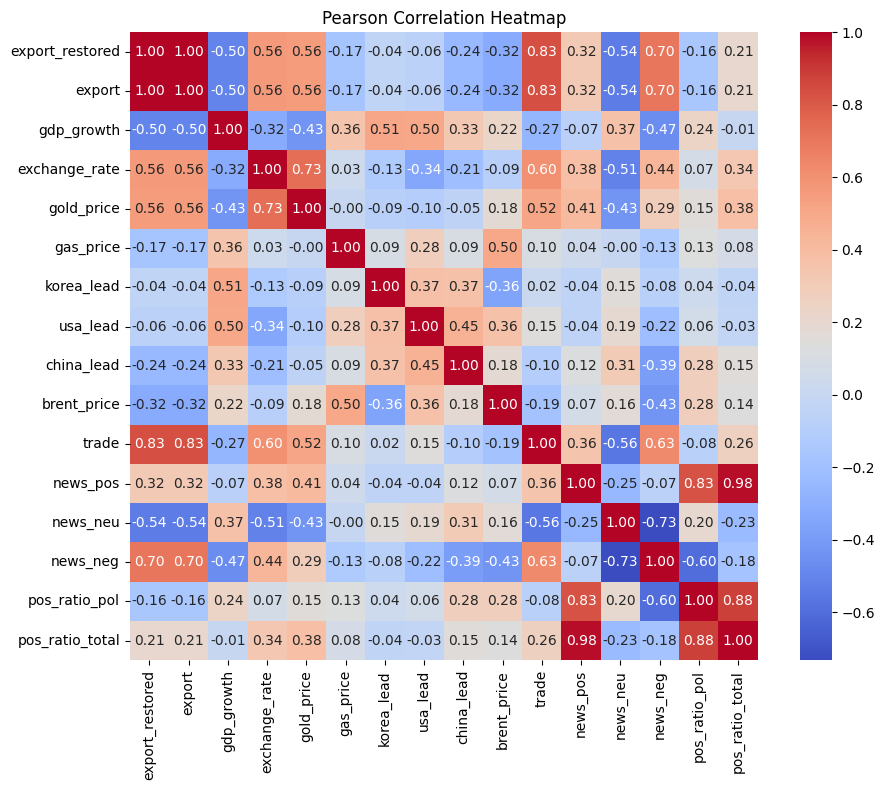

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()


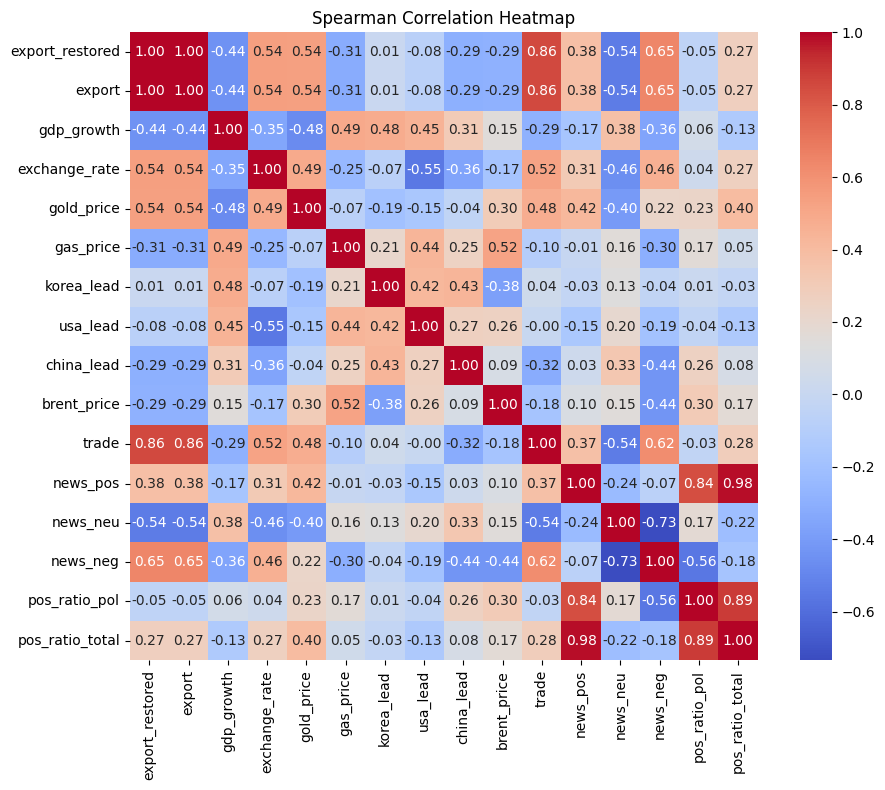

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()

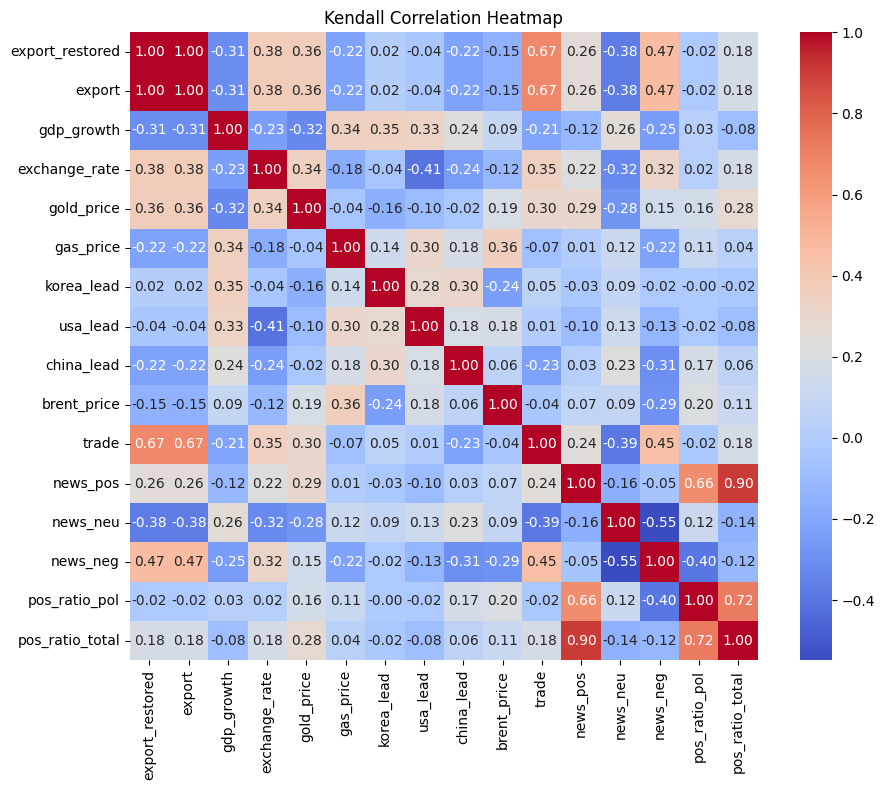

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Kendall Correlation Heatmap')
plt.tight_layout()
plt.show()


### 타켓 변수와의 상관관계 분석

In [ ]:
corr_with_export = corr_pearson['export'].sort_values(ascending=False)
print(corr_with_export)
#exchange rate : 양의 상관관계
#gold : 양의 상관관계
#gdp_growth : 음의 상관관계 ? (주의 필요)

export_restored    1.000000
export             1.000000
trade              0.832635
news_neg           0.704694
exchange_rate      0.563326
gold_price         0.556384
news_pos           0.320485
pos_ratio_total    0.206776
korea_lead        -0.040578
usa_lead          -0.063815
pos_ratio_pol     -0.162591
gas_price         -0.174573
china_lead        -0.242205
brent_price       -0.324473
gdp_growth        -0.503237
news_neu          -0.537049
Name: export, dtype: float64


In [ ]:
corr_with_export = corr_spearman['export'].sort_values(ascending=False)
print(corr_with_export)

export_restored    1.000000
export             1.000000
trade              0.855659
news_neg           0.645890
exchange_rate      0.542043
gold_price         0.535372
news_pos           0.376971
pos_ratio_total    0.270821
korea_lead         0.006940
pos_ratio_pol     -0.045443
usa_lead          -0.075380
brent_price       -0.290756
china_lead        -0.294284
gas_price         -0.314367
gdp_growth        -0.444262
news_neu          -0.542860
Name: export, dtype: float64


In [ ]:
corr_with_export = corr_kendall['export'].sort_values(ascending=False)
print(corr_with_export)

export_restored    1.000000
export             1.000000
trade              0.674173
news_neg           0.465463
exchange_rate      0.376111
gold_price         0.364559
news_pos           0.255917
pos_ratio_total    0.180393
korea_lead         0.019876
pos_ratio_pol     -0.020120
usa_lead          -0.038732
brent_price       -0.149823
china_lead        -0.218292
gas_price         -0.220280
gdp_growth        -0.307487
news_neu          -0.377928
Name: export, dtype: float64


# 상관관계 낮은 변수 제거

In [ ]:
# korea_lead와 usa_lead 컬럼 제거한 새 DataFrame 만들기
scaled_df = scaled_df.drop(columns=['korea_lead', 'usa_lead'])

In [ ]:
scaled_df.head()

,export_restored,export,gdp_growth,exchange_rate,gold_price,gas_price,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total
date,,,,,,,,,,,,,,
2010-01-01,532120,-1.822747,3.769231,-0.051650,-0.681625,1.556284,1.178041,0.005181,-1.289500,0.116529,1.648993,-1.771623,0.258427,0.106729
2010-02-01,499905,-2.005901,3.769231,0.156086,-0.727183,1.324590,1.133014,-0.051807,-1.219829,0.466115,-0.499417,-1.937815,0.282486,0.131579
2010-03-01,596361,-1.457512,3.769231,-0.065074,-0.691806,0.636794,1.019947,0.067821,-1.059457,0.640908,1.691961,-2.104007,0.298851,0.121495
2010-04-01,584056,-1.527470,3.923077,-0.298635,-0.630626,0.673953,0.856299,0.208878,-1.102936,1.514873,-0.757226,-1.705146,0.316327,0.157761
2010-05-01,632723,-1.250780,3.923077,0.224687,-0.516380,0.980692,0.664885,0.000000,-0.839025,0.990494,0.188074,-1.206571,0.273171,0.132075


In [ ]:
#스케일링, 상관관계 낮은 변수 제거 , 감성분석 포함 , 뉴스 긍부정,중립 각각 포함, 비율 포함
scaled_df.to_csv("all_with_sent_df.csv", index=True)

In [ ]:
#feature importance 상위 10개 존재
feat_imp_df = scaled_df.drop(columns=['china_lead', 'gdp_growth'])
feat_imp_df.to_csv("feat_imp_df.csv", index=True)

In [ ]:
feat_imp_df.head()

,export_restored,export,exchange_rate,gold_price,gas_price,korea_lead,usa_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total
date,,,,,,,,,,,,,,
2010-01-01,532120,-1.822747,-0.051650,-0.681625,1.556284,2.183653,-0.589262,0.005181,-1.289500,0.116529,1.648993,-1.771623,0.258427,0.106729
2010-02-01,499905,-2.005901,0.156086,-0.727183,1.324590,2.034808,-0.336104,-0.051807,-1.219829,0.466115,-0.499417,-1.937815,0.282486,0.131579
2010-03-01,596361,-1.457512,-0.065074,-0.691806,0.636794,1.886687,-0.167107,0.067821,-1.059457,0.640908,1.691961,-2.104007,0.298851,0.121495
2010-04-01,584056,-1.527470,-0.298635,-0.630626,0.673953,1.743183,-0.098566,0.208878,-1.102936,1.514873,-0.757226,-1.705146,0.316327,0.157761
2010-05-01,632723,-1.250780,0.224687,-0.516380,0.980692,1.599408,-0.120287,0.000000,-0.839025,0.990494,0.188074,-1.206571,0.273171,0.132075


In [ ]:
feat_imp_news_df = feat_imp_df.drop(columns=['news_pos', 'news_neu', 'news_neg'])
feat_imp_df.to_csv("feat_imp_news_df.csv", index=True)

In [ ]:
#긍,부,중 갯수 데이터
news_sent_df = scaled_df.drop(columns=['pos_ratio_pol', 'pos_ratio_total'])
news_sent_df.to_csv("no_ratio_df.csv", index=True)

In [ ]:
#긍,부정 갯수 데이터 (중립, 비율 x)
news_pol_df = scaled_df.drop(columns=['pos_ratio_pol', 'pos_ratio_total', 'news_neu'])
news_pol_df.to_csv("no_neutral_df.csv", index=True)

In [ ]:
#비율 포함 데이터
news_ratio_df = scaled_df.drop(columns=['news_pos', 'news_neu', 'news_neg'])
news_ratio_df.to_csv("only_ratio_df.csv", index=True)

In [ ]:
#중립 미포함 비율값
pos_ratio_pol_df = scaled_df.drop(columns=['news_pos', 'news_neu', 'news_neg', 'pos_ratio_total'])
pos_ratio_pol_df.to_csv("pos_ratio_pol_df.csv", index=True)

In [ ]:
#중립 포함 비율값
pos_ratio_total_df = scaled_df.drop(columns=['news_pos', 'news_neu', 'news_neg', 'pos_ratio_pol'])
pos_ratio_total_df.to_csv("pos_ratio_total_df.csv", index=True)

# 이상치 제거 ver

In [ ]:
import pandas as pd
import numpy as np

# 복사본 생성
cleaned_df = scaled_df.copy()

# 각 컬럼별 이상치 처리
for col in cleaned_df.columns:
    if col == 'export':  # 타겟 변수는 학습 목적상 보정하지 않음
        continue

    # 1. 사분위수 계산
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. 이상치 기준 정의 (1.5 * IQR 초과/미만)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 3. 이상치 마스크 만들기
    outlier_mask = (cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound)

    # 4. 이상치에 대해 보정
    for idx in cleaned_df[outlier_mask].index:
        # 이전 달, 다음 달의 인덱스를 확인
        prev_idx = cleaned_df.index.get_loc(idx) - 1
        next_idx = cleaned_df.index.get_loc(idx) + 1

        # 보정할 이전값/다음값 조건 체크 (시계열 처음과 끝일 경우 대비)
        valid_prev = prev_idx >= 0
        valid_next = next_idx < len(cleaned_df)

        # 앞뒤 평균으로 보정
        if valid_prev and valid_next:
            prev_val = cleaned_df.iloc[prev_idx][col]
            next_val = cleaned_df.iloc[next_idx][col]
            cleaned_df.at[idx, col] = (prev_val + next_val) / 2
        elif valid_prev:
            cleaned_df.at[idx, col] = cleaned_df.iloc[prev_idx][col]
        elif valid_next:
            cleaned_df.at[idx, col] = cleaned_df.iloc[next_idx][col]
        else:
            cleaned_df.at[idx, col] = cleaned_df[col].median()  # 예외적으로 중앙값 대체


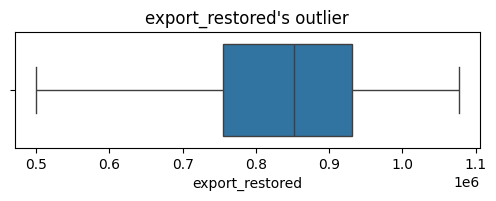

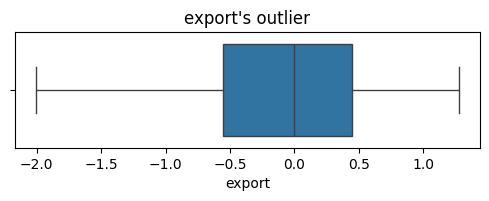

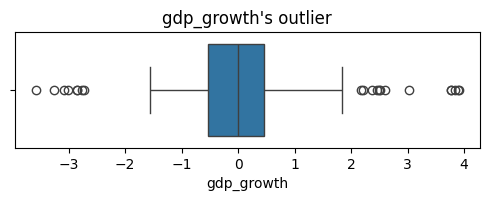

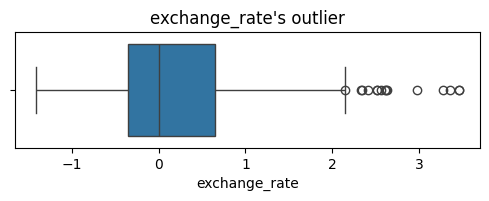

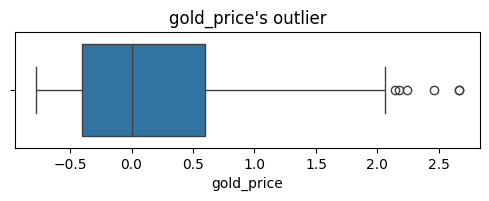

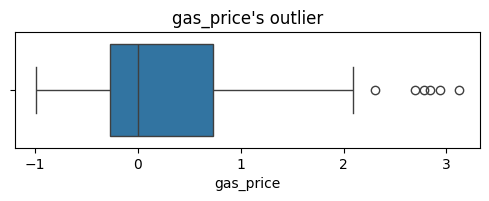

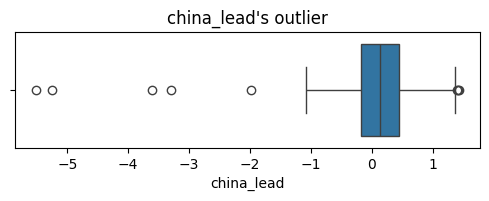

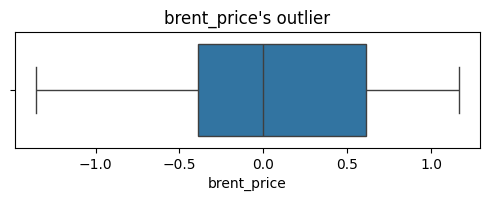

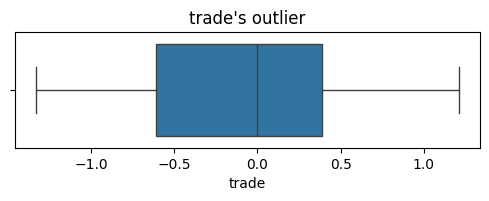

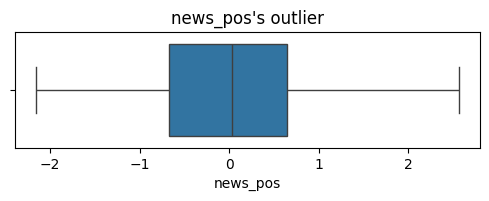

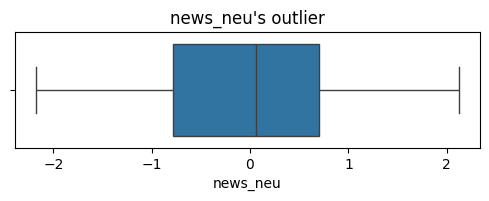

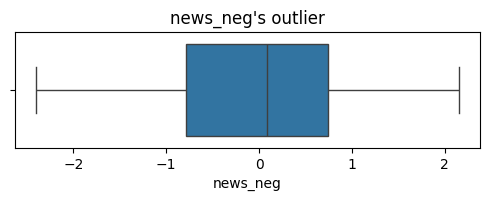

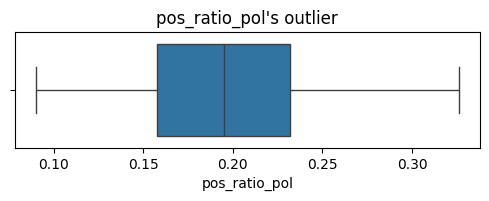

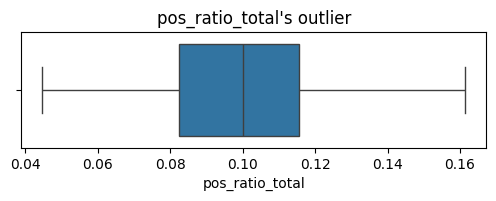

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=cleaned_df[col])
    plt.title(f'{col}' + "'s outlier")
    plt.show()


In [ ]:
def replace_outliers_with_median(df, threshold=1.5):
    df_corrected = scaled_df.copy()

    for col in df_corrected.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_corrected[col].quantile(0.25)
        Q3 = df_corrected[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # 이상치 조건
        is_outlier = (df_corrected[col] < lower_bound) | (df_corrected[col] > upper_bound)

        # 이상치를 해당 열의 중앙값으로 대체
        median_value = df_corrected[col].median()
        df_corrected.loc[is_outlier, col] = median_value

    return df_corrected


In [ ]:
df_corrected = replace_outliers_with_median(scaled_df)

print("보정 전 shape:", scaled_df.shape)
print("보정 후 shape:", df_corrected.shape)  # shape는 변하지 않음


보정 전 shape: (183, 14)
보정 후 shape: (183, 14)


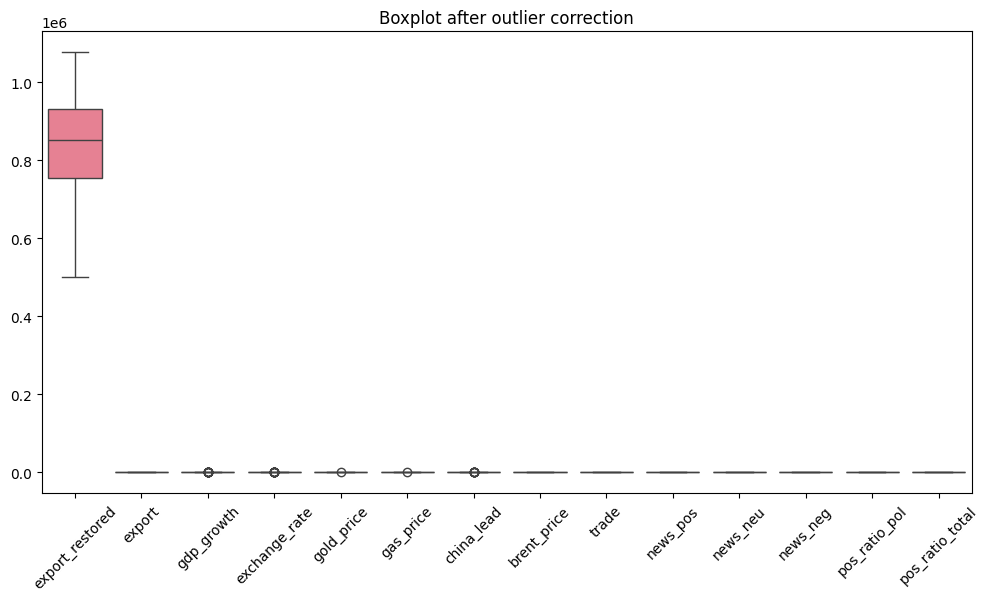

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_corrected)
plt.xticks(rotation=45)
plt.title("Boxplot after outlier correction")
plt.show()


In [ ]:
df_corrected.describe()

,export_restored,export,gdp_growth,exchange_rate,gold_price,gas_price,china_lead,brent_price,trade,news_pos,news_neu,news_neg,pos_ratio_pol,pos_ratio_total
count,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000
mean,8.374356e+05,-0.086909,-0.116015,0.080731,0.086528,0.157353,0.104325,0.050294,-0.041948,-0.014327,2.329648e-16,0.000000,0.196093,0.100079
std,1.275980e+05,0.725444,0.689006,0.771222,0.600041,0.644966,0.505162,0.577574,0.584030,0.983198,1.002743e+00,1.002743,0.050254,0.024819
min,4.999050e+05,-2.005901,-1.538462,-1.410694,-0.777177,-0.987250,-1.077859,-1.355705,-1.329863,-2.155781,-2.175177e+00,-2.403152,0.090090,0.044743
25%,7.558180e+05,-0.550937,-0.384615,-0.352389,-0.403879,-0.264845,-0.138604,-0.388202,-0.611856,-0.670040,-7.787105e-01,-0.791091,0.157904,0.082465
50%,8.527220e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.133368,0.000000,0.000000,0.029132,5.916932e-02,0.089725,0.194872,0.100218
75%,9.317075e+05,0.449063,0.307692,0.411263,0.532183,0.637887,0.403129,0.611798,0.388144,0.640908,7.036923e-01,0.737874,0.231617,0.115521
max,1.076986e+06,1.275028,1.846154,2.143117,2.062109,2.092532,1.359950,1.165666,1.209444,2.563632,2.121643e+00,2.150504,0.326087,0.161435


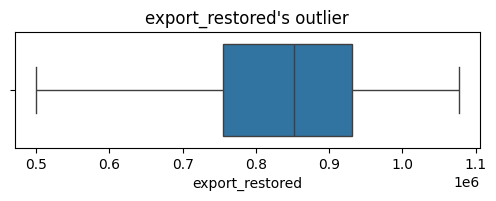

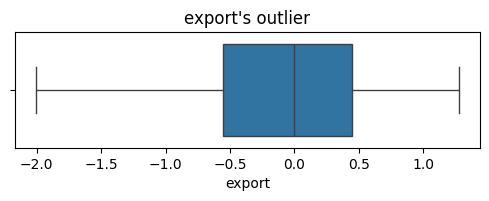

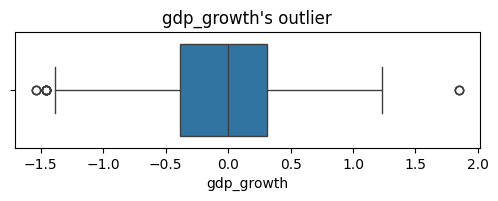

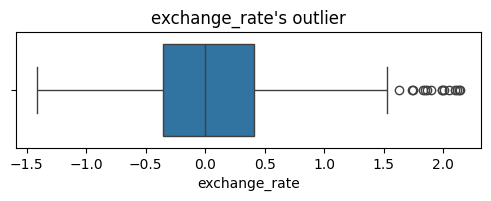

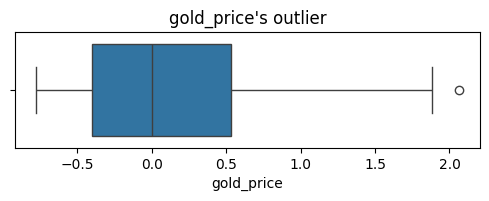

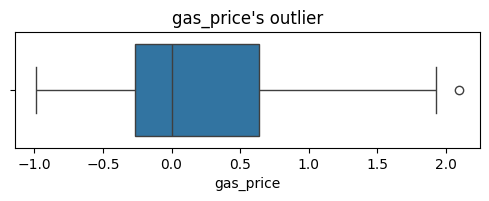

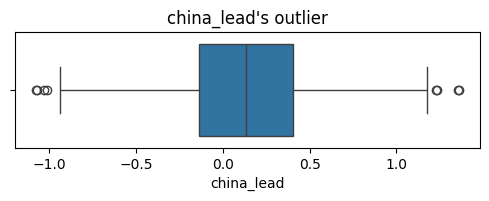

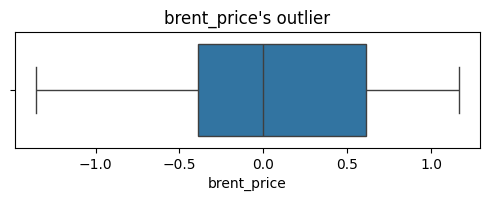

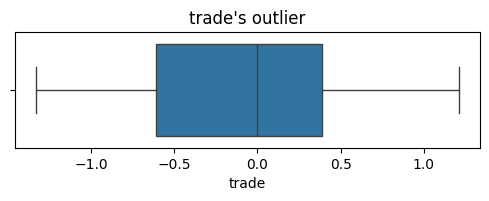

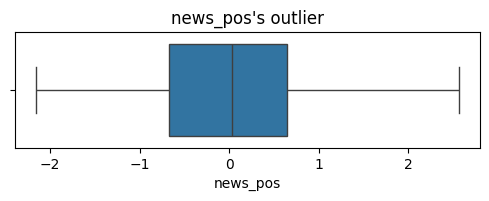

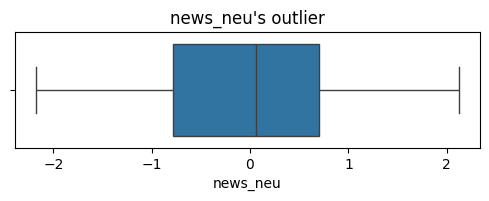

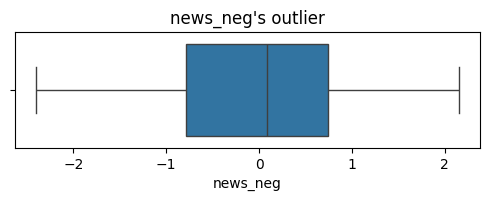

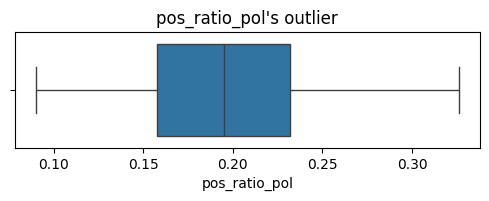

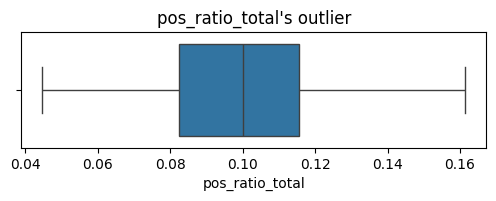

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = df_corrected.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_corrected[col])
    plt.title(f'{col}' + "'s outlier")
    plt.show()

In [ ]:
# df_corrected.to_csv("cleaned_outlier_df.csv", index=True)

In [ ]:
no_outlier_sent_df = df_corrected.drop(columns=['pos_ratio_pol', 'pos_ratio_total', 'news_neu'])
no_outlier_sent_df.to_csv("no_outlier_sent_df.csv", index=True)

In [ ]:
no_outlier_ratio_pol_df = df_corrected.drop(columns=['news_pos', 'news_neu', 'news_neg', 'pos_ratio_total'])
no_outlier_ratio_pol_df.to_csv("no_outlier_ratio_pol_df.csv", index=True)